In [1]:
import numpy as np
import pandas as pd
import os

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

from scipy.special import rel_entr
from scipy.stats import entropy
import scipy.stats
import math
import warnings 
warnings.filterwarnings("ignore") 

In [2]:
# 使用GPU
os.environ["CUDA_VISIBLE_DEVICES"]="1"

In [3]:
! nvidia-smi

Tue Aug  2 16:47:05 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.129.06   Driver Version: 470.129.06   CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 00000000:01:00.0 Off |                  N/A |
| 73%   83C    P2   163W / 260W |   5747MiB / 11019MiB |     99%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  NVIDIA GeForce ...  Off  | 00000000:02:00.0 Off |                  N/A |
| 32%   

# MongoDB

In [4]:
from pymongo import MongoClient
import pymongo

In [5]:
mongoURI = "mongodb://%s:%s@%s/%s?authMechanism=SCRAM-SHA-1" % ("eva", "eva_30241", "140.117.69.70:30241", "eva")

try:
    conn = pymongo.MongoClient(mongoURI)
    db = conn.eva
    # db_rm_us = db.rm_patent_us
    # db_rm_cn = db.rm_patent_cn
    # db_rm_de = db.rm_patent_de
    
    # db_rm_us_2018 = db.rm_patent_us_2018
    db_rm_cn_2018 = db.rm_patent_cn_2018
    # db_rm_de_2018 = db.rm_patent_de_2018
except errors.ConnectionFailure as err:
    print(err)

# 2018

## Company數量

In [6]:
data_assignee = db_rm_cn_2018.aggregate([
    {"$unwind" : "$current_assignee"},
    {"$group" : {"_id" : "$current_assignee", "count":{"$sum":1}}},
    {"$sort": {"count":-1}},
    {"$limit":30}
])

ls_company = []
ls_count = []
for data in data_assignee:
    # print(data["_id"],data["count"])
    ls_company.append(data["_id"])
    ls_count.append(data["count"])
    
df_family_cn = pd.DataFrame((zip(ls_company, ls_count)), columns = ['company', 'count'])

In [7]:
# 取總數前15家公司
# final_df.groupby("company").sum().reset_index().sort_values("count",ascending=False).head(15)
df_family_cn.groupby("company").sum().reset_index().sort_values("count",ascending=False).head(16)

,company,count
20,Qualcomm Inc,321
10,Huawei Technologies Co Ltd,265
21,Samsung Electronics Co Ltd,234
28,Xian Irain IoT Technology Service Co Ltd,177
16,NTT Docomo Inc,129
22,Shanghai Langbo Communication Technology Co Ltd,112
2,China Mobile Communications Group Co Ltd,99
17,NTT Korea Co Ltd,73
26,Telefonaktiebolaget LM Ericsson AB,72
8,Guangdong Oppo Mobile Telecommunications Corp Ltd,63


In [8]:
# com_df = final_df.groupby("company").sum().reset_index().sort_values("count",ascending=False).head(15)
com_df = df_family_cn.groupby("company").sum().reset_index().sort_values("count",ascending=False).head(15)
com_df.reset_index(drop=True, inplace=True)

In [9]:
com_df["count_log"] = com_df["count"].apply(lambda x: np.log(x))
com_df

,company,count,count_log
0,Qualcomm Inc,321,5.771441
1,Huawei Technologies Co Ltd,265,5.579730
2,Samsung Electronics Co Ltd,234,5.455321
3,Xian Irain IoT Technology Service Co Ltd,177,5.176150
4,NTT Docomo Inc,129,4.859812
5,Shanghai Langbo Communication Technology Co Ltd,112,4.718499
6,China Mobile Communications Group Co Ltd,99,4.595120
7,NTT Korea Co Ltd,73,4.290459
8,Telefonaktiebolaget LM Ericsson AB,72,4.276666
9,Guangdong Oppo Mobile Telecommunications Corp Ltd,63,4.143135


In [10]:
com_ls = list(com_df.company)

## Data

In [11]:
ccontry = pd.read_csv("../patent/code/依年分/rm_company_country_cn_2018.csv")
ccpc = pd.read_csv("../LDA/company_lda_brief_cn_2018.csv")

In [12]:
ccontry[ccontry.company.isin(com_ls)]

,company,AR,AT,AU,BE,BR,CA,CL,CN,CO,...,PH,PL,PT,RO,RU,SE,SG,TW,US,ZA
77,Apple Inc,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,58.0,0.0
379,China Mobile Communications Group Co Ltd,0.0,0.0,2.0,0.0,2.0,2.0,0.0,233.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0
415,China University of Geosciences,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
682,Guangdong Oppo Mobile Telecommunications Corp Ltd,0.0,0.0,36.0,0.0,12.0,14.0,0.0,62.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,14.0,22.0,49.0,0.0
982,Huawei Technologies Co Ltd,0.0,0.0,13.0,0.0,22.0,9.0,0.0,267.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,118.0,0.0
1070,Intel Corp,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,42.0,0.0
1239,LG Electronics Inc,0.0,0.0,2.0,0.0,4.0,2.0,3.0,42.0,0.0,...,3.0,0.0,0.0,0.0,3.0,0.0,2.0,0.0,41.0,1.0
1338,NTT Docomo Inc,0.0,0.0,13.0,0.0,41.0,23.0,0.0,202.0,0.0,...,5.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,121.0,0.0
1339,NTT Korea Co Ltd,0.0,0.0,8.0,0.0,30.0,16.0,0.0,146.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,104.0,0.0
1568,Qualcomm Inc,1.0,0.0,13.0,0.0,112.0,49.0,4.0,319.0,4.0,...,4.0,0.0,0.0,0.0,2.0,0.0,65.0,163.0,307.0,0.0


## Similarity計算

### Country

- 換成機率  

In [13]:
ccontry.set_index("company", inplace=True)
ccontry2 = ccontry.apply(lambda x: x/sum(x), axis=1) #比例 row(axis=1)加總為1

### PBC
- 和Samsung Electronics Co Ltd比較

In [14]:
ccontry_pbc = ccontry2.loc[com_ls,:].copy()
ccontry_pbc.head()

,AR,AT,AU,BE,BR,CA,CL,CN,CO,DE,...,PH,PL,PT,RO,RU,SE,SG,TW,US,ZA
company,,,,,,,,,,,,,,,,,,,,,
Qualcomm Inc,0.000636,0.0,0.008270,0.0,0.071247,0.031170,0.002545,0.202926,0.002545,0.000636,...,0.002545,0.000000,0.000000,0.0,0.001272,0.0,0.041349,0.103690,0.195293,0.0
Huawei Technologies Co Ltd,0.000000,0.0,0.022109,0.0,0.037415,0.015306,0.000000,0.454082,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.003401,0.0,0.001701,0.000000,0.200680,0.0
Samsung Electronics Co Ltd,0.000000,0.0,0.025694,0.0,0.001028,0.009250,0.000000,0.289825,0.000000,0.002055,...,0.003083,0.001028,0.001028,0.0,0.000000,0.0,0.004111,0.003083,0.197328,0.0
Xian Irain IoT Technology Service Co Ltd,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0
NTT Docomo Inc,0.000000,0.0,0.016839,0.0,0.053109,0.029793,0.000000,0.261658,0.000000,0.000000,...,0.006477,0.000000,0.000000,0.0,0.000000,0.0,0.007772,0.000000,0.156736,0.0


In [15]:
def PBC(a,b):
    return sum(a*b)

ccontry_pbc["sum"] = ccontry_pbc.apply(lambda x: PBC(ccontry_pbc.loc["Samsung Electronics Co Ltd",:],x), axis=1)

### CPC

In [16]:
ccpc.set_index("company", inplace=True)
ccpc2 = ccpc.apply(lambda x: x/sum(x), axis=1) #比例 row(axis=1)加總為1

In [17]:
ccpc_pbc = ccpc2.loc[com_ls,:].copy()
# ccpc_pbc

In [18]:
def PBC(a,b):
    return sum(a*b)

ccpc_pbc["sum"] = ccpc_pbc.apply(lambda x: PBC(ccpc_pbc.loc["Samsung Electronics Co Ltd",:],x), axis=1)

## Scatter Plot

In [19]:
# loop test
def scatter_plot(pbc_n,cpc_n):
    # PBC
    pbc_ls=[]
    n = pbc_n
    for i in ccontry_pbc.index:
        pbc = ccontry_pbc.loc[[i],:]["sum"].values+n*((com_df.count_log[com_df.company=="Samsung Electronics Co Ltd"].values-com_df.count_log[com_df.company==i].values)**2)
        pbc_ls.append(pbc[0])

    ccontry_pbc["pbc"]=pbc_ls
    
    # CPC
    pbc_ls=[]
    n = cpc_n
    for i in ccpc_pbc.index:
        pbc = ccpc_pbc.loc[[i],:]["sum"].values+n*((com_df.count_log[com_df.company=="Samsung Electronics Co Ltd"].values-com_df.count_log[com_df.company==i].values)**2)
        pbc_ls.append(pbc[0])

    ccpc_pbc["pbc"]=pbc_ls
    
    c_df = pd.DataFrame((zip(list(ccpc_pbc["pbc"]), list(ccontry_pbc["pbc"]))), columns = ['cpc', 'country'])
    c_df.set_index(ccpc_pbc.index, inplace=True)

    return c_df

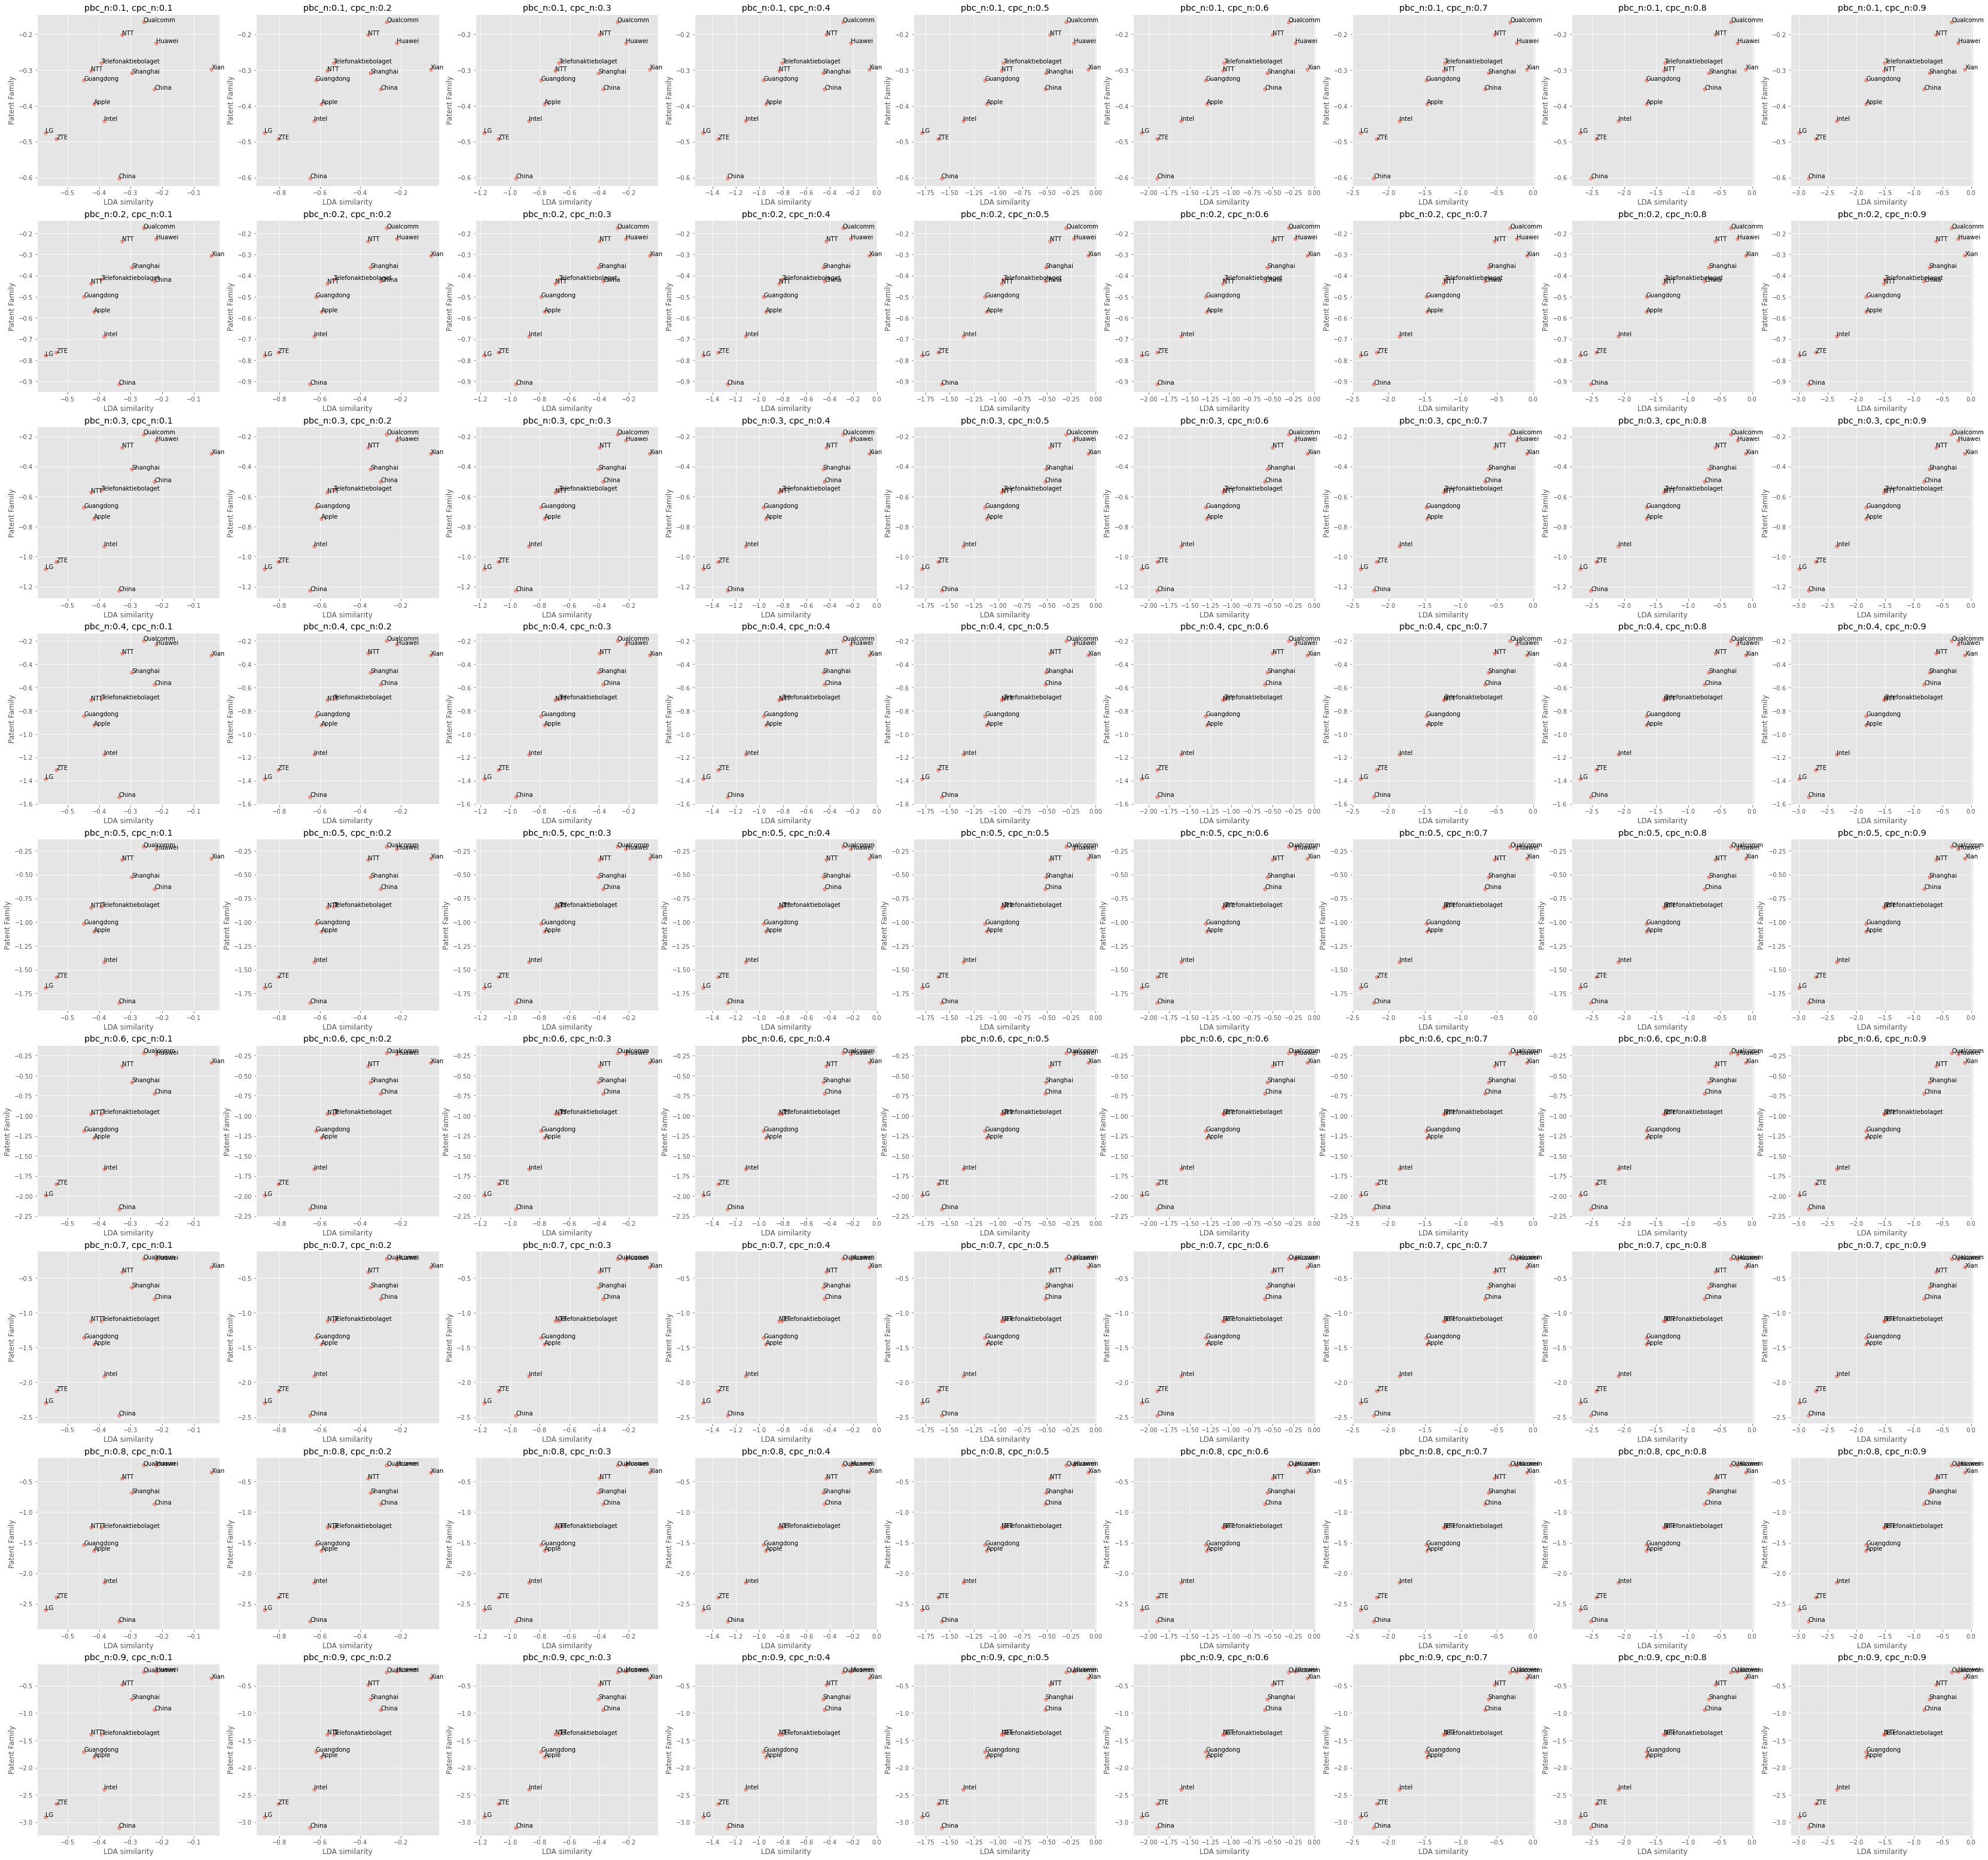

In [20]:
pbc_n_ls=np.arange(0.1,1,0.1)
cpc_n_ls=np.arange(0.1,1,0.1)

n=0
plt.figure(figsize=(58,56))
plt.style.use('ggplot')

for i,pbc_n in enumerate(pbc_n_ls):
    for k,cpc_n in enumerate(cpc_n_ls):
        # print(pbc_n,cpc_n)
        c_df = scatter_plot(pbc_n,cpc_n)
        c_df = c_df.drop("Samsung Electronics Co Ltd")
        

        #plot
        plt.subplot(len(pbc_n_ls), len(cpc_n_ls), n + 1)
        plt.scatter(-c_df.cpc, -c_df.country, alpha=0.5)
        plt.title("pbc_n:{}, cpc_n:{}".format(round(pbc_n,2),round(cpc_n,2)))
        plt.xlabel("LDA similarity")
        plt.ylabel("Patent Family")

        for i, txt in enumerate(c_df.index):
            plt.text(-c_df.cpc[i], -c_df.country[i],txt.split(" ")[0])

            
        n+=1
plt.savefig('./img/plot_cn_brief_2018_1.png'.format(pbc_n))

In [21]:
c_df

,cpc,country
company,,
Qualcomm Inc,0.339027,0.245481
Huawei Technologies Co Ltd,0.230395,0.236310
Xian Irain IoT Technology Service Co Ltd,0.105731,0.359968
NTT Docomo Inc,0.609766,0.484814
Shanghai Langbo Communication Technology Co Ltd,0.730146,0.742578
China Mobile Communications Group Co Ltd,0.816215,0.945189
NTT Korea Co Ltd,1.511811,1.387292
Telefonaktiebolaget LM Ericsson AB,1.504282,1.391481
Guangdong Oppo Mobile Telecommunications Corp Ltd,1.825596,1.706108


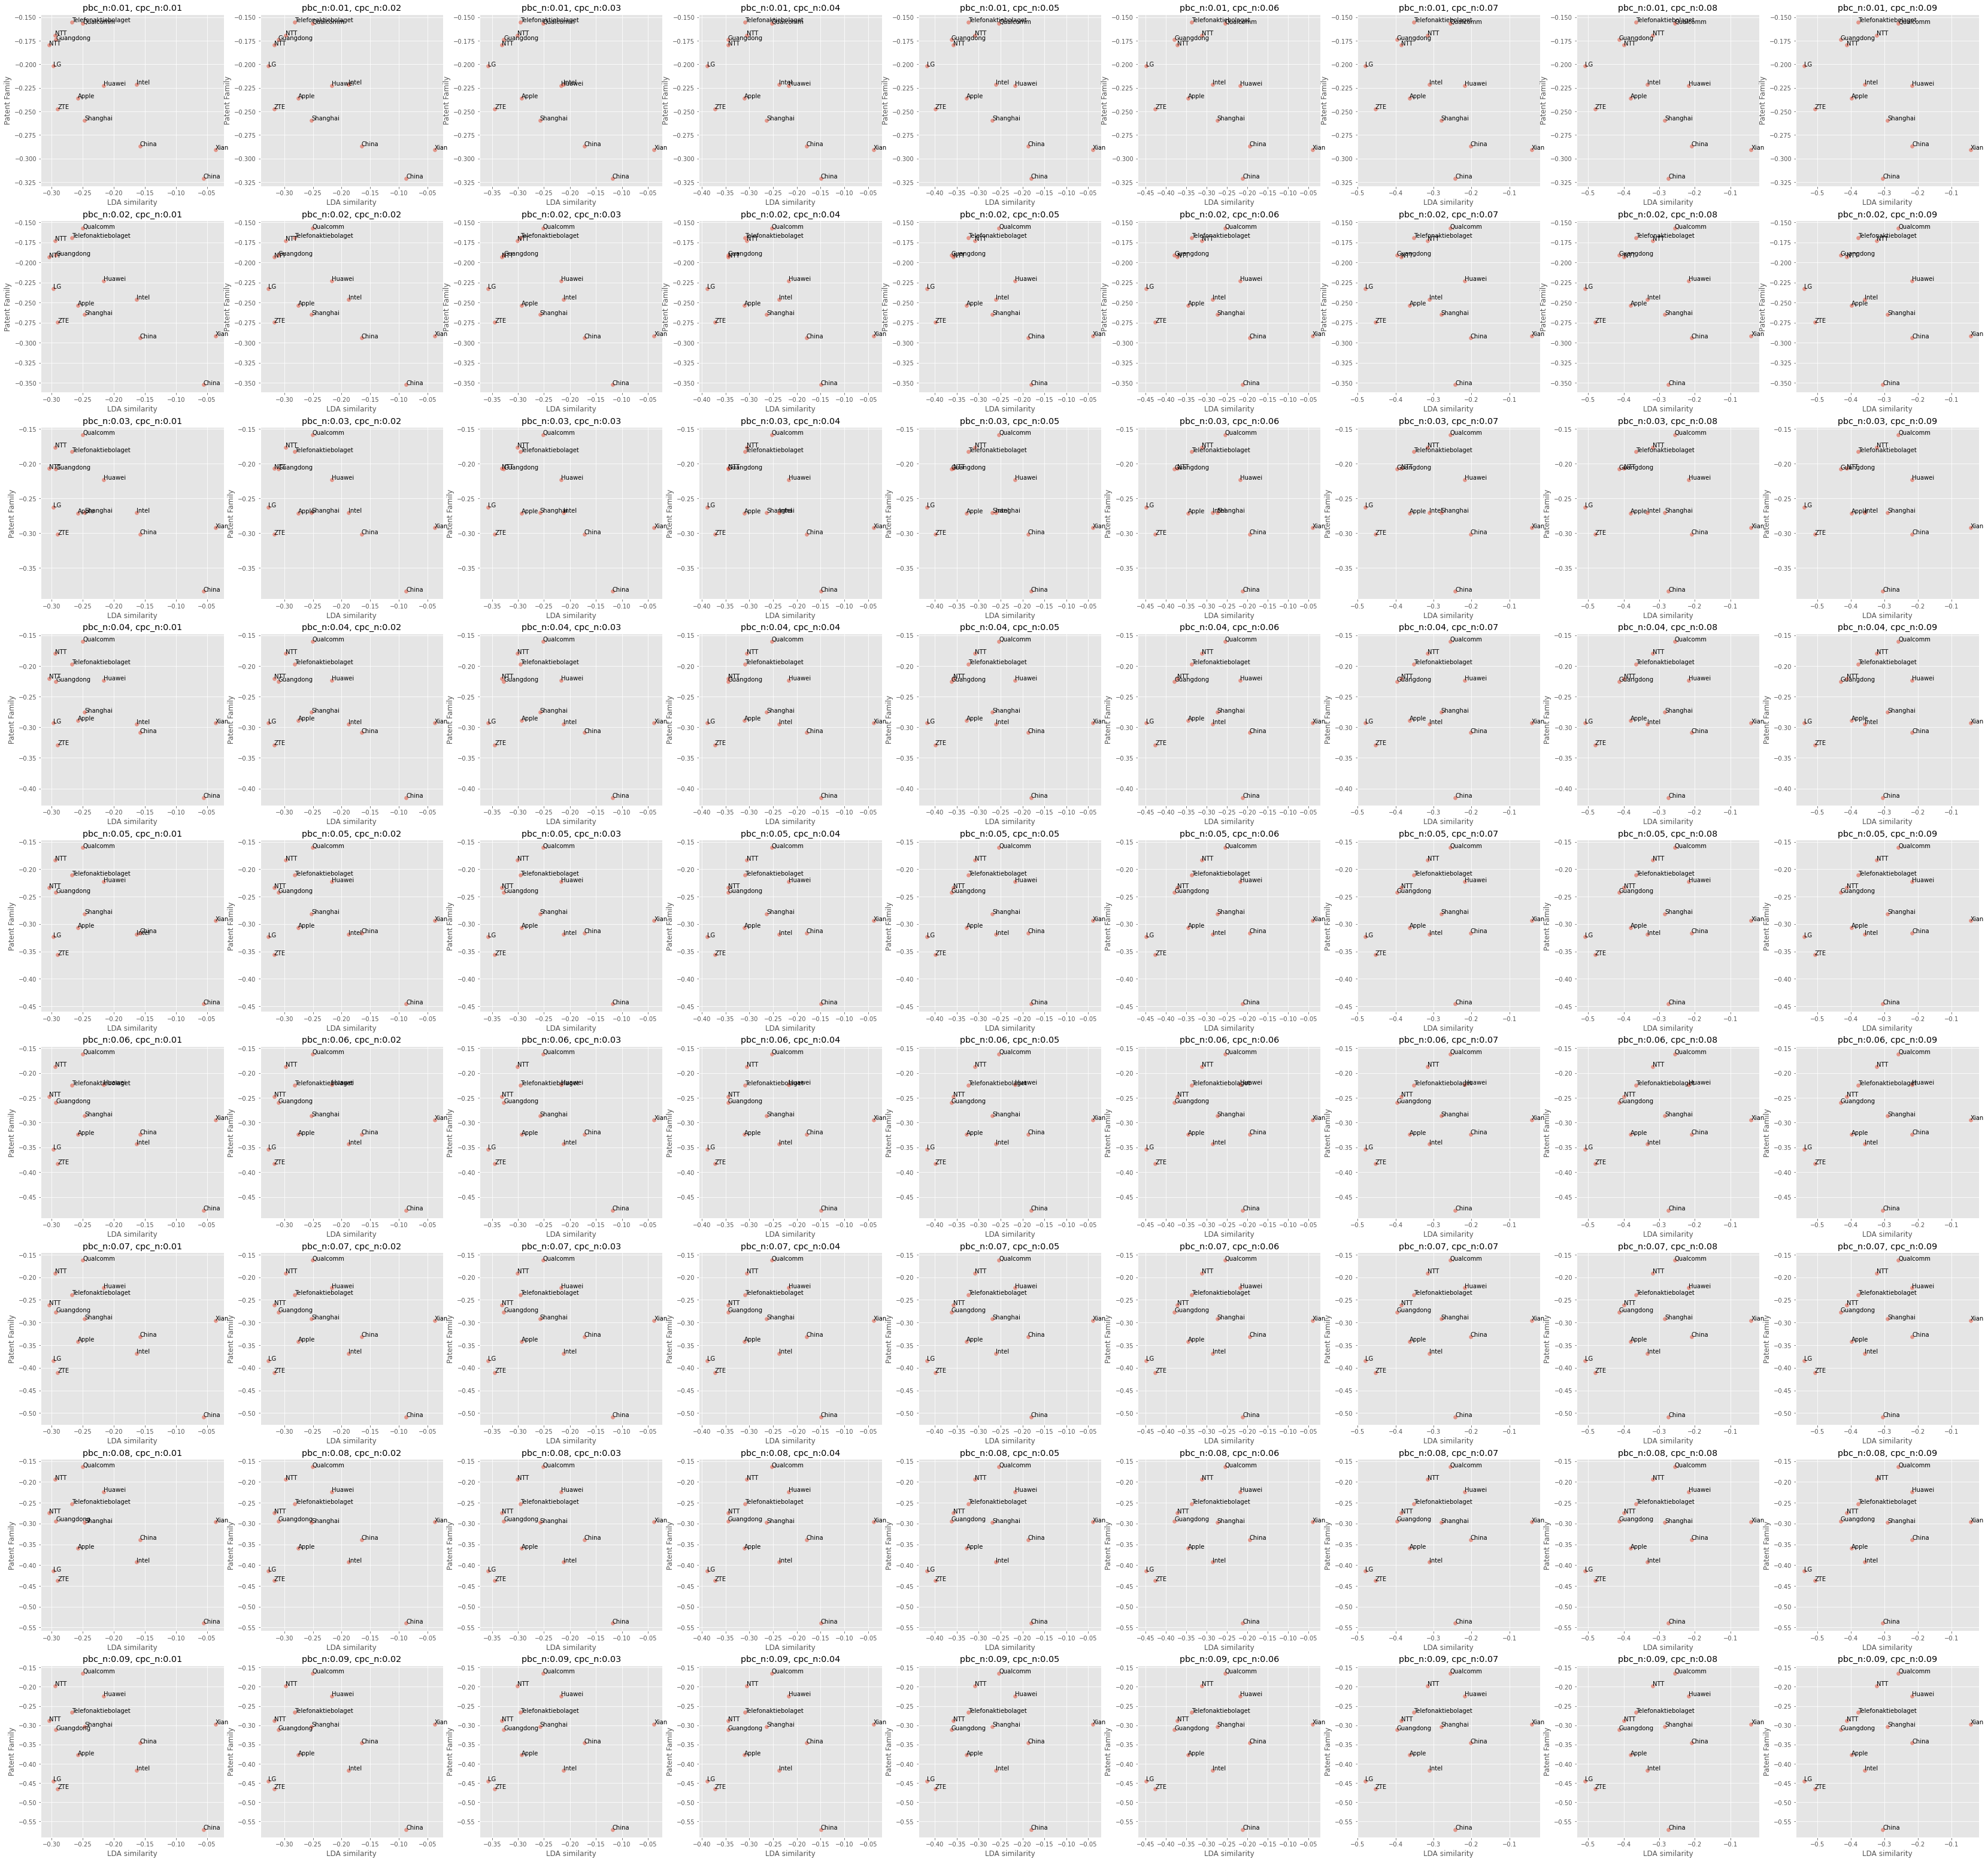

In [22]:
pbc_n_ls=np.arange(0.01,0.1,0.01)
cpc_n_ls=np.arange(0.01,0.1,0.01)

n=0
plt.figure(figsize=(58,56))
plt.style.use('ggplot')

for i,pbc_n in enumerate(pbc_n_ls):
    for k,cpc_n in enumerate(cpc_n_ls):
        # print(pbc_n,cpc_n)
        c_df = scatter_plot(pbc_n,cpc_n)
        c_df = c_df.drop("Samsung Electronics Co Ltd")
        

        #plot
        plt.subplot(len(pbc_n_ls), len(cpc_n_ls), n + 1)
        plt.scatter(-c_df.cpc, -c_df.country, alpha=0.5)
        plt.title("pbc_n:{}, cpc_n:{}".format(round(pbc_n,2),round(cpc_n,2)))
        plt.xlabel("LDA similarity")
        plt.ylabel("Patent Family")

        for i, txt in enumerate(c_df.index):
            plt.text(-c_df.cpc[i], -c_df.country[i],txt.split(" ")[0])

            
        n+=1
plt.savefig('./img/plot_cn_brief_2018_2.png'.format(pbc_n))

In [23]:
c_df

,cpc,country
company,,
Qualcomm Inc,0.258082,0.164536
Huawei Technologies Co Ltd,0.217858,0.223773
Xian Irain IoT Technology Service Co Ltd,0.042603,0.296840
NTT Docomo Inc,0.322515,0.197563
Shanghai Langbo Communication Technology Co Ltd,0.290391,0.302823
China Mobile Communications Group Co Ltd,0.216858,0.345833
NTT Korea Co Ltd,0.412720,0.288201
Telefonaktiebolaget LM Ericsson AB,0.379007,0.266207
Guangdong Oppo Mobile Telecommunications Corp Ltd,0.430911,0.311423


In [24]:
c_df = scatter_plot(pbc_n,cpc_n)
c_df = c_df.reset_index()
c_df["company"] = c_df.company.apply(lambda x: x.replace(" Inc","")\
                                                    .replace(" Co Ltd","")\
                                                    .replace(" Co. Ltd.","")\
                                                    .replace(" Co., Ltd.","")\
                                                    .replace(" Ltd","")\
                                                    .replace(" Corp","")\
                                                    .replace("..","")\
                                                    .replace("International Business Machines","IBM")\
                                                    .replace("Nippon Telegraph and Telephone","Nippon Telegraph & Tel")\
                                                    .replace("Alibaba Group Holding Ltd","Alibaba")\
                                                    .replace("ZTE Intelligent IoT Technology","ZTE")\
                                                    .replace("AT&T Intellectual Property I LP","AT&T")\
                                                    .replace("Microsoft Technology Licensing LLC","Microsoft")\
                                                    .replace("Telefonaktiebolaget LM Ericsson AB","Ericsson")\
                                                    .replace("Cisco Technology","Cisco Systems")\
                                                    .replace("Verizon Patent and Licensing","Verizon Communications")\
                                                    .replace("Nokia Technologies Oy","Nokia")\
                                                    .replace("China Mobile Communications Group","China Mobile")\
                                                    .replace("Nokia Solutions and Networks Oy","Nokia")\
                                                    .replace("China Mobile","China_Mobile")\
                                                    .replace("China Mobile IoT","China_Mobile_IoT")\
                                                    .replace("China United Network Communications Group","China_Unicom")\
                                                    .replace("Shanghai Langbo Communication Technology","Shanghai_Langbo")\
                                                    .replace("State Grid of China SGCC","SGCC")\
                                                    .replace("Beijing Sankuai Online Technology","Beijing_Sankuai")\
                                                    .replace("Beijing Xiaomi Mobile Software","Xiaomi")\
                                                    .replace("Guangdong Oppo Mobile Telecommunications","Oppo")\
                                                    .replace("Shanghai Roye Electric Science and Technology","Shanghai_Roye_Electric")\
                                                    .replace("Xian Irain IoT Technology Servic","Xian_Irain")\
                                                    .replace("China University of Geosciences","CUG"))
c_df.set_index("company", inplace=True)
c_df = c_df.drop("Samsung Electronics")

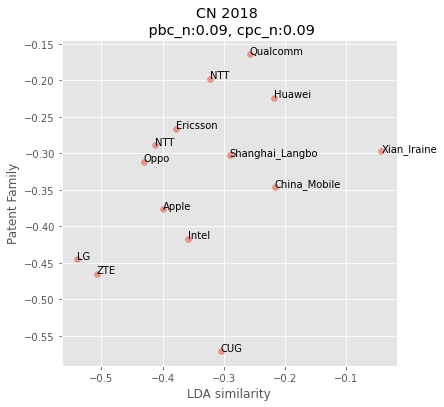

In [25]:
pbc_n=0.09
cpc_n=0.09
# c_df = scatter_plot(pbc_n,cpc_n)
# c_df = c_df.drop("Samsung Electronics Co Ltd")

plt.figure(figsize=(6,6))
plt.style.use('ggplot')
#plot
# plt.subplot(len(pbc_n_ls), len(cpc_n_ls), n + 1)
plt.scatter(-c_df.cpc, -c_df.country, alpha=0.5)
plt.title("CN 2018 \n pbc_n:{}, cpc_n:{}".format(round(pbc_n,2),round(cpc_n,2)))
plt.xlabel("LDA similarity")
plt.ylabel("Patent Family")

for i, txt in enumerate(c_df.index):
    plt.text(-c_df.cpc[i], -c_df.country[i],txt.split(" ")[0])

In [26]:
m_x = (-max(c_df.cpc)-min(c_df.cpc))/2
m_y = (-max(c_df.country)-min(c_df.country))/2

competitor_ls = []

for i,cpc,con in zip(c_df.index,c_df["cpc"],c_df["country"]):
    if -cpc>m_x and -con>m_y:
        competitor_ls.append(1)
    elif -cpc<m_x and -con>m_y:
        competitor_ls.append(2)
    elif -cpc>m_x and -con<m_y:
        competitor_ls.append(3)
    else:
        competitor_ls.append(4)

In [27]:
competitor_ls

[1, 1, 1, 2, 1, 1, 2, 2, 2, 4, 4, 4, 4, 4]

In [28]:
c_df

,cpc,country
company,,
Qualcomm,0.258082,0.164536
Huawei Technologies,0.217858,0.223773
Xian_Iraine,0.042603,0.296840
NTT Docomo,0.322515,0.197563
Shanghai_Langbo,0.290391,0.302823
China_Mobile,0.216858,0.345833
NTT Korea,0.412720,0.288201
Ericsson,0.379007,0.266207
Oppo,0.430911,0.311423


In [29]:
c_df.to_csv("competitor_df/company/lda_cn_2018.csv")